In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import kendalltau
import numpy as np

## About the dataset:
The dataset contains survey answers for a World Bank project on estimating the impact of COVID-19 on rural India. The questionnaire can be found here: [LINK](https://microdata.worldbank.org/index.php/catalog/3769/related-materials) and [this link](https://microdata.worldbank.org/index.php/catalog/3769/data-dictionary/F1?file_name=wb1_cleaned_dataset) has a description of all the column names and what each number in the answers stands for. Essentially, the survey collects demographic data and asks questions regarding changes in food consumption, government aid, migration data, and health-related information (both awareness about COVID-19, and its impact on treatment, either for exisiting conditions or for covid)

In [2]:
df = pd.read_csv('Project_wb1_cleaned_dataset.csv')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (71,113,119,124,133,166,219,230) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Note: 
Though a warning appears in the cell above, the file works as expected, so the warning was ignored.

## Step 0: Examining the dataset
In this section, I take a look at various facets of the dataset like the number of rows and columns, what kind of data it contains, etc. 

In [3]:
df.head()

,geo_state,geo_dist,geo_state_new,geo_dist_new,geo_village,geo_block,demo_gender,demo_age,demo_edu,demo_caste,...,pc11_d_id,latitude,longitude,altitude,accuracy,master_dist_no,master_dist_name,master_hh_id_short,master_hh_id_long_str,master_health_eligible
0,28,5,1.79769313486232e+308,1.79769313486232e+308,Anatharajipeta,రైల్వే koduru,1,49,3,2,...,.,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,1.79769313486232e+308,5,5,1,280050130571,0
1,23,419,1.79769313486232e+308,1.79769313486232e+308,Chihoniya,Amba,1,27,4,1,...,419,26.5730667114258,78.2645416259766,107,9.30000019073486,419,419,1533,234194191941533,0
2,8,128,1.79769313486232e+308,1.79769313486232e+308,Gathakhedi,Chhabra,1,22,5,3,...,128,24.5474796295166,76.8690338134766,0,3500,128,Baran,621,8128196215621,1
3,20,360,20,360,Pabra,Katkamsandi,1,42,3,4,...,360,24.0558624267578,85.3426513671875,0,80.9000015258789,360,Hazaribagh,297,20360025081297,1
4,20,346,20,346,Bawliya,Dhanday,1,26,5,2,...,346,24.1507663726807,83.5898056030274,217.399993896484,7.40000009536743,346,Garwha,737,20346081494737,0


In [4]:
df.tail()

,geo_state,geo_dist,geo_state_new,geo_dist_new,geo_village,geo_block,demo_gender,demo_age,demo_edu,demo_caste,...,pc11_d_id,latitude,longitude,altitude,accuracy,master_dist_no,master_dist_name,master_hh_id_short,master_hh_id_long_str,master_health_eligible
4545,20,360,1.79769313486232e+308,1.79769313486232e+308,Saryaspur,Barhi,0,29,3,2,...,360,24.2499256134033,85.4916152954102,367,4.09999990463257,360,Hazaribagh,731,20360021365731,1
4546,8,129,8,129,Arniya,Bhawanimandi,1,35,1,1,...,129,24.2595844268799,75.8396606445312,0,3847,129,Jhalawar,268,8129197104268,1
4547,10,226,1.79769313486232e+308,1.79769313486232e+308,Nallu Pokhar Gorhi tola ward No-31,-999,1,25,2,4,...,226,25.3670196533203,86.4662628173828,-8.30000019073486,4.69999980926514,226,226,149,10226226123149,0
4548,8,113,1.79769313486232e+308,1.79769313486232e+308,Indo ka bas,Jhodpur,1,35,3,2,...,113,27.0672092437744,72.6978912353516,258.799987792969,8,113,Jodhpur,173,8113123161173,1
4549,28,551,1.79769313486232e+308,1.79769313486232e+308,Kamalapuram,Kamalapuram,0,21,3,1,...,551,14.5847969055176,78.6612777709961,0,13.6000003814697,551,551,1429,285515517451429,0


In [5]:
df.shape

(4550, 258)

In [6]:
df.dtypes

geo_state                  int64
geo_dist                   int64
geo_state_new             object
geo_dist_new              object
geo_village               object
                           ...  
master_dist_no             int64
master_dist_name          object
master_hh_id_short         int64
master_hh_id_long_str      int64
master_health_eligible     int64
Length: 258, dtype: object

In [7]:
df['geo_state'].value_counts() #Checking the number of states for which I have the data

8     1770
20    1168
9      710
28     481
23     214
10     207
Name: geo_state, dtype: int64

In [8]:
df['geo_dist_new'].value_counts()

1.79769313486232e+308    2926
128                       147
129                       140
346                       106
120                       103
                         ... 
349                         1
173                         1
439                         1
140                         1
419                         1
Name: geo_dist_new, Length: 79, dtype: int64

#### Note about data:

A look at the head and tail of the database showed that there was a possibility of corrupt or missing data [identified by the value "1.79769313486232e+308" being present across rows and columns]. But after looking at the website from which the data was downloaded, I realised that the issue was missing data. The website provided the number of "SYSMISS" values for each question, which tallied with the number of "1.79769313486232e+308" values present in geo_dist_new. Considering the large size of the dataframe as well as several cells that had missing values, I explored the data initially on excel (working with a copy of the dataset) as well as the questionnaire data on the website. Then, I just selected the columns I considered usable (columns which had a limited number of missing values) to the new dataframe below.  

In [9]:
df2 = df[['geo_state', 'geo_dist','demo_gender','demo_age', 'demo_edu', 'demo_caste', 'demo_religion', 'demo_selfhelp', 'demo_ag_hh', 'demo_hh_size', 'con_feb', 'con_wk', 'con_weekchange_mean', 'con_wk_atta', 'con_curr_atta','con_wk_onions', 'con_curr_onions', 'con_wk_rice', 'con_curr_rice']].copy()

## 1. Exploring data:

Since I was primarily interested in the consumption patterns, I thought it would be relevant to check it against various demographic factors.

### 1.1 Caste identity and consumption patterns:
Of all the values in this smaller dataframe, the relation between caste identity and changes in consumption patterns seemed intriguing. Over the centuries, people from lower castes have been systemically oppressed and prevented from owning lands through a variety of ways. Thus, in a rural landscape, people who do not own farmland which could potentially experience a more drastic change in consumption patterns than the people who own farmlands (and thus have a partial guarantee of food security). In the section below, I attempt to see if there are significant differences between groups in consumption patterns (comparing consumption at the start of the pandemic in February to the May (when the survey was conducted)).

In [10]:
df2['demo_caste'].value_counts()

4                        1628
1                         870
2                         801
3                         594
1.79769313486232e+308     472
-999                      114
99                         59
-888                       12
Name: demo_caste, dtype: int64

##### Guide to the values above:
888 = Refused to respond
<br>999 = Don't know
<br>1 = General category [Author's note: Upper caste}
<br>2 = Scheduled Caste
<br>3 = Scheduled Tribe
<br>4 = Other Backward Castes
<br>99 = Other [Author's note: Most commonly other religions]
<br>1.79769313486232e+308 = Missing values

In [11]:
df2_clean = df2[df2.demo_caste != "1.79769313486232e+308"] #Removing the rows with missing/corrupt values

In [12]:
df2_clean['demo_caste'].value_counts()

4       1628
1        870
2        801
3        594
-999     114
99        59
-888      12
Name: demo_caste, dtype: int64

In [13]:
df2_clean.shape

(4078, 19)

In [14]:
df2_clean.head()

,geo_state,geo_dist,demo_gender,demo_age,demo_edu,demo_caste,demo_religion,demo_selfhelp,demo_ag_hh,demo_hh_size,con_feb,con_wk,con_weekchange_mean,con_wk_atta,con_curr_atta,con_wk_onions,con_curr_onions,con_wk_rice,con_curr_rice
0,28,5,1,49,3,2,1,1,0,5,5000,7500,3,1.79769313486232e+308,1.79769313486232e+308,35,15,50,65
1,23,419,1,27,4,1,1,0,1,3,3000,700,-0.0666666701436043,25,20,50,20,1.79769313486232e+308,1.79769313486232e+308
2,8,128,1,22,5,3,1,1,1,4,5000,1500,0.200000002980232,24,20,80,22,1.79769313486232e+308,1.79769313486232e+308
3,20,360,1,42,3,4,1,1,1,5,6000,1000,-0.333333343267441,30,30,30,15,1.79769313486232e+308,1.79769313486232e+308
4,20,346,1,26,5,2,1,1,0,9,5000,1200,-0.0399999991059303,25,22,40,40,1.79769313486232e+308,1.79769313486232e+308


##### Isolation of relevant columns:
In the cells below, I'm creating a smaller dataframe with just the two columns that are relevant to the topic I'm interested in: Caste identity and proportional change in consumption expenditure. The latter was already present in the dataset, and has both positive and negative values, indicating either an increase or decrese in expenses. However, for this analysis, I'm only looking at the mean value for each caste group.

In [15]:
df_mini = df2_clean[df2_clean.con_weekchange_mean != "1.79769313486232e+308"] #Cleaning the data
df_mini = df_mini[['demo_caste', 'con_weekchange_mean']]
df_mini

,demo_caste,con_weekchange_mean
0,2,3
1,1,-0.0666666701436043
2,3,0.200000002980232
3,4,-0.333333343267441
4,2,-0.0399999991059303
...,...,...
4544,4,0
4545,2,-0.314285725355148
4546,1,0.600000023841858
4548,2,-0.400000005960464


In [16]:
df_mini.groupby('demo_caste').describe()

con_weekchange_mean                                
                         count unique                 top freq
demo_caste                                                    
-888                         4      4                   1    1
-999                        83     42  -0.333333343267441    7
1                          707    127  -0.200000002980232   73
2                          656    117  -0.200000002980232   59
3                          449     99                   0   42
4                         1363    154  -0.200000002980232  122
99                          49     31  -0.200000002980232    6

In [17]:
df_mini.dtypes

demo_caste             object
con_weekchange_mean    object
dtype: object

Converting the data types in order to conduct statistical analysis:

In [18]:
df_mini['con_weekchange_mean'] = df_mini['con_weekchange_mean'].astype('float64')
df_mini['demo_caste'] = df_mini['demo_caste'].astype('int64') #Not necessary, but allows me to do a step below

In [19]:
df_mini.groupby('demo_caste').describe()

con_weekchange_mean                                                 \
                         count      mean       std    min       25%       50%   
demo_caste                                                                      
-999                      83.0 -0.026970  0.599519 -0.940 -0.453333 -0.133333   
-888                       4.0  0.580000  0.745833 -0.200  0.040000  0.560000   
 1                       707.0  0.022621  0.659975 -1.000 -0.413333 -0.100000   
 2                       656.0  0.076945  0.723517 -1.000 -0.440000 -0.066667   
 3                       449.0  0.081102  0.717021 -1.000 -0.440000 -0.040000   
 4                      1363.0  0.109727  0.713511 -1.000 -0.400000  0.000000   
 99                       49.0 -0.011706  0.714815 -0.925 -0.520000 -0.200000   

                           
                 75%  max  
demo_caste                 
-999        0.303030  2.0  
-888        1.100000  1.4  
 1          0.280000  3.0  
 2          0.333333  3.0  
 3          0.400000  3.0  
 4          0.420168  3.0  
 99         0.333333  2.0

##### Guide:
-888 = Refused to respond
<br>-999 = Don't know
<br>1 = General category (Upper caste)
<br>2 = Scheduled Caste (Minority group) 
<br>3 = Scheduled Tribe (Minority group)
<br>4 = Other Backward Castes (Minority group)
<br>99 = Other #(Very often other religions)

In [20]:
#Removing the -999 and -888 values as they are not relevant to the answering the question:
df_mini = df_mini[df_mini['demo_caste'] > 0]
df_mini = df_mini[df_mini['demo_caste']<5]
df_mini['demo_caste'].value_counts()

4    1363
1     707
2     656
3     449
Name: demo_caste, dtype: int64

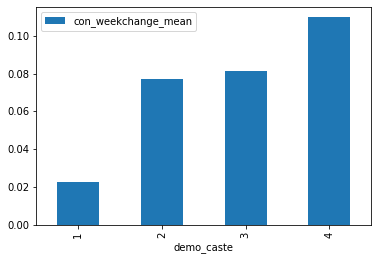

In [21]:
#Plotting data to a graph to see how different the values are:
df_mini[['con_weekchange_mean', 'demo_caste']].groupby('demo_caste').agg(np.mean).plot(kind='bar') 

In [22]:
#Creating a new dataframe for each caste group to conduct ttest:
df_gen = df_mini[df_mini['demo_caste']==1]['con_weekchange_mean']
df_sc = df_mini[df_mini['demo_caste']==2]['con_weekchange_mean']
df_st = df_mini[df_mini['demo_caste']==3] ['con_weekchange_mean']
df_obc = df_mini[df_mini['demo_caste']==4] ['con_weekchange_mean']

In [23]:
df_gen.describe()

count    707.000000
mean       0.022621
std        0.659975
min       -1.000000
25%       -0.413333
50%       -0.100000
75%        0.280000
max        3.000000
Name: con_weekchange_mean, dtype: float64

In [24]:
df_sc.describe()

count    656.000000
mean       0.076945
std        0.723517
min       -1.000000
25%       -0.440000
50%       -0.066667
75%        0.333333
max        3.000000
Name: con_weekchange_mean, dtype: float64

#### Note:
I will be conducting the t-test on the General caste category compared to the other ones because the other groups are minority groups, while the general category represents the priviledged caste category in Indian society.  

In [25]:
ttest_ind(df_gen, df_sc)
results = ttest_ind(df_gen, df_sc)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*results)) #Not significant

t(1361) = -1.450, p = 0.147


In [26]:
res = ttest_ind(df_gen, df_st)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*res)) #Not significant

t(1154) = -1.420, p = 0.156


In [27]:
result = ttest_ind(df_gen, df_obc)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*result)) #p = 0.007

t(2068) = -2.701, p = 0.007


#### Note:
Since there is a significant difference only in one case, I don't think it is justifiable to use caste as a reliable marker for group-based differences in consumption patterns.

### 1.2 Education levels and consumption patterns:
Since the previous section showed a tenous link between caste and consumption change, I'm  going to continue exploring the dataset. This time, I will be looking at the link between consumption patterns and another relevant demographic factor—education. I will be repeating the same steps as above in the section below.

In [28]:
df2['demo_edu'].value_counts()

3                        1633
5                         723
1                         648
2                         554
4                         510
1.79769313486232e+308     471
-888                        8
-999                        3
Name: demo_edu, dtype: int64

##### Guide for understanding values:
-999 = Don't know 
<br> -888 = Refused to respond
<br> -777 = Half complete
<br> 1 = No schooling
<br> 2 = Class 5 or less
<br> 3 = Class 5-10
<br> 4 = High school graduate
<br> 5 = More than high school 
<br> 1.79769313486232e+308 = Missing values 

In [29]:
df2_edu = df2[df2.demo_edu != "1.79769313486232e+308"] #Cleaning missing values from Education column
df2_edu = df2_edu[df2_edu.con_weekchange_mean != '1.79769313486232e+308'] #Cleaning missing values from weekchange column
print(df2_edu['demo_edu'].value_counts())
print(df2_edu.shape)

3       1355
5        615
1        476
2        448
4        413
-888       4
-999       3
Name: demo_edu, dtype: int64
(3314, 19)


In [30]:
df2_edu = df2_edu[['demo_edu', 'con_weekchange_mean']]
df2_edu

,demo_edu,con_weekchange_mean
0,3,3
1,4,-0.0666666701436043
2,5,0.200000002980232
3,3,-0.333333343267441
4,5,-0.0399999991059303
...,...,...
4544,5,0
4545,3,-0.314285725355148
4546,1,0.600000023841858
4548,3,-0.400000005960464


In [31]:
df2_edu.dtypes

demo_edu               object
con_weekchange_mean    object
dtype: object

In [32]:
df2_edu['con_weekchange_mean'] = df2_edu['con_weekchange_mean'].astype('float64')
df2_edu['demo_edu'] = df2_edu['demo_edu'].astype('int64') 

Not sure why I get a warning for the block of code above. I've used practically the same code in the caste segment but did not get a warning. But the code works, so not sure if it is relevant.

In [33]:
df2_edu['demo_edu'].value_counts()

 3      1355
 5       615
 1       476
 2       448
 4       413
-888       4
-999       3
Name: demo_edu, dtype: int64

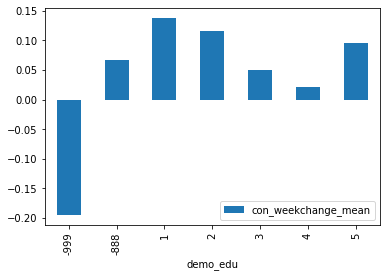

In [34]:
df2_edu[['con_weekchange_mean', 'demo_edu']].groupby('demo_edu').agg(np.mean).plot(kind='bar') #Plotting graph

##### Guide for understanding values:
-999 = Don't know 
<br> -888 = Refused to respond
<br> -777 = Half complete
<br> 1 = No schooling
<br> 2 = Class 5 or less
<br> 3 = Class 5-10
<br> 4 = High school graduate
<br> 5 = More than high school

##### Note:
In this case, instead of removing the -999 and -888 values, and then looking at the remaining values and conducting a t-test, I decided to conduct a t-test with the highest [5] and lowest education levels [1] as well as the lowest value in the graph [4] (excluding the not answered sections) in order to guage whether the differences were statistically significant.

In [35]:
#Creating mini dataframes to conduct t-tests:
df_educ_one = df2_edu[df2_edu['demo_edu']==1]['con_weekchange_mean']
df_educ_five = df2_edu[df2_edu['demo_edu']==5]['con_weekchange_mean']
df_educ_four = df2_edu[df2_edu['demo_edu']==4]['con_weekchange_mean']

In [36]:
results_edu = ttest_ind(df_educ_four, df_educ_five)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*results_edu)) #p = 0.79; Not significant

t(1026) = -1.758, p = 0.079


In [37]:
results_educ = ttest_ind(df_educ_four, df_educ_one)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*results_educ)) # p = 0.012; Also not significant

t(887) = -2.503, p = 0.012


### 1.3 State-based differences and its link to consumption pattern changes during COVID-19 lockdown:
The results of analysing both of these demographic factors have not turned out to be statistically significant (except in the case of general category vs Other Backward Castes).

As an alternative, I'm now going to look into another relevant factor: state-based differences in consumption patterns. As India is a federal union, the fight against COVID-19, specifically for relief efforts has been taking place at the state-level. Therefore, differences between states could be interesting to analyse against the backdrop of different state-based relief efforts.

In [38]:
df2['geo_state'].value_counts()

8     1770
20    1168
9      710
28     481
23     214
10     207
Name: geo_state, dtype: int64

In [39]:
df_state = df[['geo_state', 'con_weekchange_mean', 'con_feb', 'con_wk', 'latitude', 'longitude']]

**Note:** This time, instead of selecting the state and proportional change in consumption, I take the columns for states, proportional consumption change [Pre-calculated], consumption during the month of February, Consumption in the week (Last week of April) before the survey was taken, as well as latitude and longitude.  

In [40]:
df_state.head()

,geo_state,con_weekchange_mean,con_feb,con_wk,latitude,longitude
0,28,3,5000,7500,1.79769313486232e+308,1.79769313486232e+308
1,23,-0.0666666701436043,3000,700,26.5730667114258,78.2645416259766
2,8,0.200000002980232,5000,1500,24.5474796295166,76.8690338134766
3,20,-0.333333343267441,6000,1000,24.0558624267578,85.3426513671875
4,20,-0.0399999991059303,5000,1200,24.1507663726807,83.5898056030274


In [41]:
df_state.shape

(4550, 6)

In [42]:
df_state = df_state[df_state.con_weekchange_mean != "1.79769313486232e+308"]
#Only cleaning con_weekchange_mean column this time because geo_state is clean as seen by value_counts() above

In [43]:
df_state.shape

(3519, 6)

In [44]:
df_state['geo_state'].value_counts()

8     1408
20     831
9      548
28     423
23     165
10     144
Name: geo_state, dtype: int64

In [45]:
df_state.dtypes

geo_state               int64
con_weekchange_mean    object
con_feb                object
con_wk                 object
latitude               object
longitude              object
dtype: object

In [46]:
df_state['con_weekchange_mean'] = df_state['con_weekchange_mean'].astype('float64')
#df_state['con_feb'] = df_state['con_feb'].astype('float64')

In [47]:
df_state.groupby('geo_state').describe()

con_weekchange_mean                                          \
                        count      mean       std       min       25%   
geo_state                                                               
8                      1408.0  0.087953  0.648546 -1.000000 -0.360000   
9                       548.0 -0.005098  0.637988 -1.000000 -0.444444   
10                      144.0  0.013715  0.665243 -1.000000 -0.440000   
20                      831.0  0.068059  0.729273 -1.000000 -0.466667   
23                      165.0  0.030405  0.554479 -0.942857 -0.333333   
28                      423.0  0.222524  0.933071 -1.000000 -0.400000   

                                         
                50%       75%       max  
geo_state                                
8          0.000000  0.400000  1.666667  
9         -0.200000  0.200000  1.666667  
10        -0.094017  0.333333  1.800000  
20        -0.090909  0.333333  2.000000  
23        -0.040000  0.400000  1.133333  
28         0.000000  0.450000  3.000000

In [48]:
df_state['con_weekchange_mean'].describe()

count    3519.000000
mean        0.079204
std         0.705454
min        -1.000000
25%        -0.400000
50%        -0.040000
75%         0.333333
max         3.000000
Name: con_weekchange_mean, dtype: float64

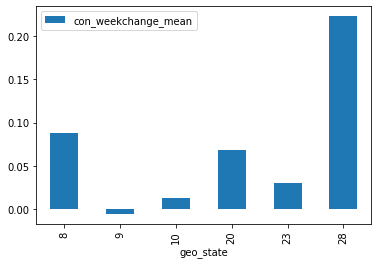

In [49]:
df_state[['con_weekchange_mean', 'geo_state']].groupby('geo_state').agg(np.mean).plot(kind='bar')

##### Guide for understanding values:
8 = Rajasthan 
<br> 9 = Uttar Pradesh
<br> 10 = Bihar
<br> 20 = Jharkhand
<br> 23 = Madhya Pradesh
<br> 28 = Andhra Pradesh

**Note:** Here, immediately, the state Andhra Pradesh stands out. Its average is more than twice of the closest state. Looking back at the .describe() command above, even the fact that the lowest value is actually a negative value is interesting. To check whether these differences are really relevant, I conduct t-tests:

In [50]:
#Testing significance levels for difference between highest and lowest values:
df_state_UP = df_state[df_state['geo_state']==9] ['con_weekchange_mean']
df_state_AP = df_state[df_state['geo_state']==28] ['con_weekchange_mean']
results_tt = ttest_ind(df_state_UP, df_state_AP)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*results_tt)) #Difference between the highest and lowest mean values is significant

t(969) = -4.507, p = 0.000


In [51]:
#Comparing two states that are somewhat close in their values:
df_state_RJ = df_state[df_state['geo_state']==8] ['con_weekchange_mean']
df_state_JH = df_state[df_state['geo_state']==20] ['con_weekchange_mean']
result_tt = ttest_ind(df_state_RJ, df_state_JH)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*result_tt)) #Not significant

t(2237) = 0.669, p = 0.503


In [52]:
#Comparing two other states that have close difference in values:
df_state_MP = df_state[df_state['geo_state']==23] ['con_weekchange_mean']
df_state_BR = df_state[df_state['geo_state']==10] ['con_weekchange_mean']
resul_tt = ttest_ind(df_state_MP, df_state_BR)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*resul_tt)) #Also not significant

t(307) = 0.240, p = 0.810


In [53]:
#This time, comparing state with the highest change in value to the second closest state:
esult_tt = ttest_ind(df_state_AP, df_state_RJ)
print('t({2:.0f}) = {0:.3f}, p = {1:.3f}'.format(*esult_tt)) #p value is significant

t(1829) = 3.351, p = 0.001


##### Update on status:
Since Andhra Pradesh has a significant difference compared to other states, I decided to use this as the basis of my article. I investigated various other factors that could perhaps be linked to this and could potentially explain at least a part of what we see. While I tried to look for data that could explain this, there was a paucity of databases from the past or present year. Instead, I focused on the most obvious explaination: the differences among states about their relief policies. 

## 2. Plotting data

In this section, I will plot a bar chart that displays the data from above. Only this time, instead of proportional change in consumption costs, I will plot the change in consumption as a percentage since this is easier to understand for a wider population. 
<br> Additonally, an attempt was made to map the data based on the geolocation via an external tool [Datawrapper], however, because of the absence of district-level maps, a decision was made to abandon this line of investigation as well. However, given more time, it could be interesting to study if there are district-level differences (as identified by the latitude and longitudinal locations of each data point) within a state. 

In [54]:
df_state['Percentage_change'] = df_state['con_weekchange_mean']*100
df_state['Percentage_change'].describe() #Used to provide average change in six states in the article

count    3519.000000
mean        7.920408
std        70.545367
min      -100.000000
25%       -40.000001
50%        -4.000000
75%        33.333334
max       300.000000
Name: Percentage_change, dtype: float64

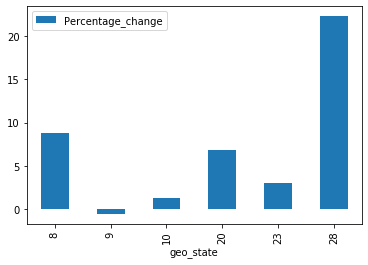

In [55]:
df_state[['Percentage_change', 'geo_state']].groupby('geo_state').agg(np.mean).plot(kind='bar')

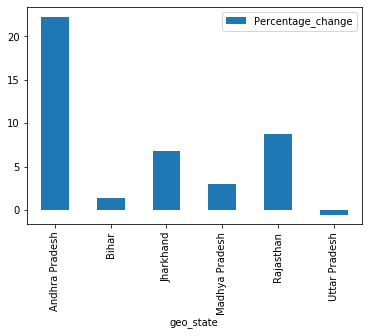

In [56]:
df_state['geo_state'].replace({8:"Rajasthan", 9:"Uttar Pradesh", 10:"Bihar", 20:"Jharkhand", 23:"Madhya Pradesh", 28:"Andhra Pradesh"}, inplace=True)
df_state[['Percentage_change', 'geo_state']].groupby('geo_state').agg(np.mean).plot(kind='bar')

##### Note: 

To get a "prettier" looking plot, I decide to use Seaborn instead:

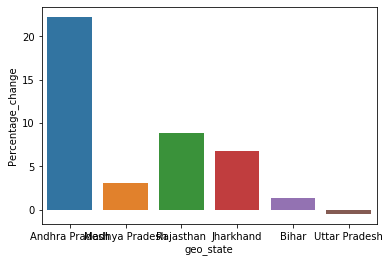

In [57]:
sns.barplot(x="geo_state", y='Percentage_change', data=df_state, ci=0)

##### Note: 
Since the difference between values is immediately visible, but the exact value of each bar is not, I decide to add the value of each bar at the top of it. Since I do not plan on using interactive visuals, this is a quick and easy way for someone to access the value of each bar. 

In [58]:
groupedvalues = df_state.groupby('geo_state').mean().reset_index()
groupedvalues.head()

,geo_state,con_weekchange_mean,Percentage_change
0,Andhra Pradesh,0.222524,22.252365
1,Bihar,0.013715,1.371528
2,Jharkhand,0.068059,6.805851
3,Madhya Pradesh,0.030405,3.040538
4,Rajasthan,0.087953,8.795250


[Text(0, 0, 'Andhra Pradesh'),
 Text(0, 0, 'Bihar'),
 Text(0, 0, 'Jharkhand'),
 Text(0, 0, 'Madhya Pradesh'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'Uttar Pradesh')]

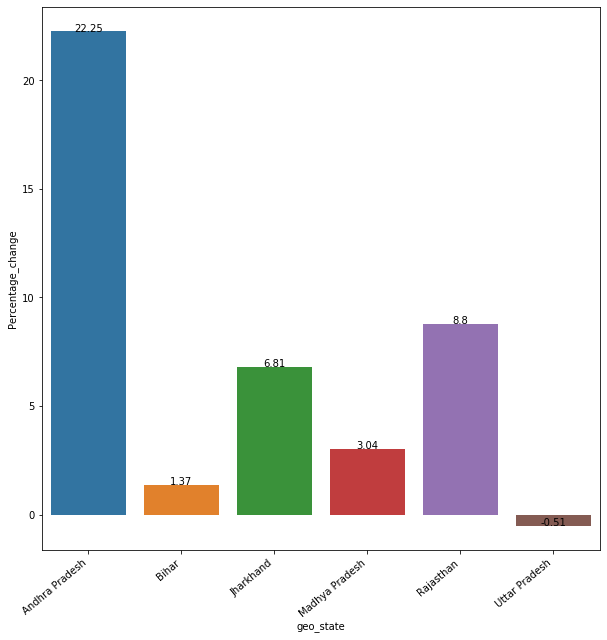

<Figure size 1152x432 with 0 Axes>

In [59]:
#Setting size of graph:
fig_dims = (10, 10) 
fig, ax = plt.subplots(figsize=fig_dims)

#Creating seaborn plot with numeric value of each bar on top:
g =sns.barplot(x='geo_state',y='Percentage_change',data=groupedvalues, ax=ax)
plt.figure(figsize=(16, 6))
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Percentage_change, round(row.Percentage_change,2), ha="center")
#Tilting bar's labels to prevent overlap:
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")


In [60]:
#Renaming x and y axis:
g.set(xlabel='States', ylabel='% change in expenses between February-April 2020')
#Saving as an image:
get = g.get_figure()
get.savefig('Graph.png')

## 3. Additional analysis:
While looking for state-level differences in rural India, I came across a table which provided data about average income and household expenditure at the state and national level. Since the way household expenditure was defined was similar to the way in which the survey defines it, I decided, it could be used to enhance the story. However, the data was from 2016-17, which is why the average rural income could not be used meaningfully by itself. Therefore, I decided to use the proportion of income that accounts for household expenses, which still provides some (data-backed) perspective to the implications of changes in consumption expenses.   

In [61]:
df_rural_inc = pd.read_csv('avg income and expenditure rural 2016-17-nabard.csv')
df_rural_inc

,States,Income,Consumption expenditure,Surplus,Unnamed: 4,Unnamed: 5
0,All India,8059,6646,1413,NaN,NaN
1,Andhra Pradesh,5842,5746,95,NaN,NaN
2,Arunachal Pradesh,9877,7722,2155,NaN,NaN
3,Assam,8880,6814,2066,NaN,NaN
4,Bihar,6277,6015,262,NaN,NaN
5,Chhattisgarh,7272,5607,1665,NaN,NaN
6,Goa,10758,9445,1313,NaN,NaN
7,Gujarat,10518,7490,3028,NaN,NaN
8,Haryana,12072,8646,3426,NaN,NaN
9,Himachal Pradesh,11702,8556,3146,NaN,NaN


In [62]:
df_rural_inc = df_rural_inc.drop(["Unnamed: 4", "Unnamed: 5", "Surplus"], axis=1)

In [63]:
df_rural_inc['% of income spent on HH expenses'] = df_rural_inc['Consumption expenditure']/df_rural_inc['Income']*100

df_rural_inc

,States,Income,Consumption expenditure,% of income spent on HH expenses
0,All India,8059,6646,82.466807
1,Andhra Pradesh,5842,5746,98.356727
2,Arunachal Pradesh,9877,7722,78.181634
3,Assam,8880,6814,76.734234
4,Bihar,6277,6015,95.826032
5,Chhattisgarh,7272,5607,77.103960
6,Goa,10758,9445,87.795129
7,Gujarat,10518,7490,71.211257
8,Haryana,12072,8646,71.620278
9,Himachal Pradesh,11702,8556,73.115707


In [64]:
df_rural_inc.to_csv("Table.csv")

#### Note:
This .csv file was used to try and embed a table in the Medium article directly via Github gist, but it took time to load on mobile phones. So, a decision was made to screenshot the table above and insert it as an image in the article.

## 4. Extra data processed (Not used in the article):
While looking at the potential causes of differences between states, I thought that maybe the number of active COVID-19 cases in each state could be responsible for rise in prices. My theory was that in states with a higher number of cases, people would be more afraid of going to larger markets where one could get cheaper groceries, but one would also be faced with a higher risk of infection due to the relatively larger number of people who gathered there to buy and sell groceries. However, there seemed to be no connection between the two, which I did plan on including in the article, but due to the limited word count, I had to remove that paragraph. 

In [65]:
cvd_df = pd.read_csv('COVID_Active Cases_Copy.csv')
cvd_df

,State,District,Jan-30,Jan-31,Feb-01,Feb-02,Feb-03,Feb-04,Feb-05,Feb-06,...,Nov-29,Nov-30,Dec-01,Dec-02,Dec-03,Dec-04,Dec-05,Dec-06,Dec-07,Dec-08
0,Andhra Pradesh,Andhra Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8397.0,7840.0,7427.0,6924.0,6742.0,6422.0,6166.0,5910.0,5626.0,-867410.0
1,Andhra Pradesh,Anantapur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,242.0,216.0,215.0,238.0,233.0,202.0,191.0,206.0,198.0,-66692.0
2,Andhra Pradesh,Chittoor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,577.0,554.0,547.0,584.0,573.0,521.0,553.0,521.0,471.0,-83888.0
3,Andhra Pradesh,East Godavari,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1190.0,1133.0,1098.0,828.0,837.0,857.0,865.0,763.0,750.0,-122011.0
4,Andhra Pradesh,Guntur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1301.0,1230.0,1142.0,1067.0,1025.0,948.0,910.0,913.0,880.0,-72730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Unknown Total,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100801.0,97626.0,95232.0,91393.0,88978.0,86089.0,88355.0,79417.0,75910.0,-1945116.0
811,District Wise Total,NaN,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,...,446006.0,434598.0,427398.0,421566.0,414492.0,408163.0,401759.0,395517.0,382370.0,-9359184.0
812,MOHFW,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,446952.0,435603.0,428644.0,422943.0,416082.0,409689.0,403248.0,396729.0,383866.0,378909.0
813,Check,NaN,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,946.0,1005.0,1246.0,1377.0,1590.0,1526.0,1489.0,1212.0,1496.0,9738093.0


In [66]:
cvd_df.dtypes

State        object
District     object
Jan-30      float64
Jan-31      float64
Feb-01      float64
             ...   
Dec-04      float64
Dec-05      float64
Dec-06      float64
Dec-07      float64
Dec-08      float64
Length: 316, dtype: object

In [67]:
cvd_df = cvd_df.iloc[:,:104] 
#The 104 value was manually calculated by counting number of days in each month and adding them
#The end date chosen was 10th May (the date till which the surveys were conducted)
cvd_df

,State,District,Jan-30,Jan-31,Feb-01,Feb-02,Feb-03,Feb-04,Feb-05,Feb-06,...,May-01,May-02,May-03,May-04,May-05,May-06,May-07,May-08,May-09,May-10
0,Andhra Pradesh,Andhra Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1051.0,1051.0,1062.0,1093.0,1094.0,1012.0,1015.0,1004.0,1047.0,1010.0
1,Andhra Pradesh,Anantapur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,43.0,50.0,50.0,52.0,42.0,40.0,53.0,56.0,58.0
2,Andhra Pradesh,Chittoor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,56.0,44.0,37.0,34.0,14.0,14.0,11.0,22.0,38.0
3,Andhra Pradesh,East Godavari,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.0,28.0,25.0,23.0,23.0,20.0,20.0,20.0,20.0,15.0
4,Andhra Pradesh,Guntur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,203.0,203.0,196.0,215.0,215.0,226.0,215.0,202.0,204.0,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Unknown Total,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5233.0,5560.0,6095.0,6629.0,5999.0,6459.0,6453.0,6163.0,6163.0,7298.0
811,District Wise Total,NaN,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,...,26309.0,27891.0,29508.0,32248.0,33643.0,36247.0,37861.0,39416.0,39918.0,44945.0
812,MOHFW,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,24124.0,25583.0,27112.0,28090.0,30834.0,32341.0,34526.0,36514.0,38195.0,39816.0
813,Check,NaN,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,-2185.0,-2308.0,-2396.0,-4158.0,-2809.0,-3906.0,-3335.0,-2902.0,-1723.0,-5129.0


#### Note:
Since I did not want to use district-level data, I wanted to isolate the rows with state-level data. Since the value of state and district in these rows were the same, I chose to isolate it in a new dataframe in the following way:

In [68]:
cvd_df_n = cvd_df[cvd_df.State == cvd_df.District]
cvd_df_n

,State,District,Jan-30,Jan-31,Feb-01,Feb-02,Feb-03,Feb-04,Feb-05,Feb-06,...,May-01,May-02,May-03,May-04,May-05,May-06,May-07,May-08,May-09,May-10
0,Andhra Pradesh,Andhra Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1051.0,1051.0,1062.0,1093.0,1094.0,1012.0,1015.0,1004.0,1047.0,1010.0
15,Arunachal Pradesh,Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,Bihar,Bihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,365.0,379.0,364.0,394.0,395.0,374.0,305.0,305.0,370.0,343.0
117,Chattisgarh,Chattisgarh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,7.0,7.0,21.0,21.0,22.0,23.0,23.0,23.0,23.0
147,Goa,Goa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,Gujarat,Gujarat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3750.0,3896.0,4096.0,4290.0,4496.0,4713.0,4878.0,5081.0,5475.0,5856.0
224,Jharkhand,Jharkhand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.0,90.0,85.0,85.0,85.0,85.0,88.0,77.0,77.0,77.0
250,Karnataka,Karnataka,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,317.0,304.0,295.0,303.0,312.0,310.0,309.0,346.0,346.0,394.0
282,Kerala,Kerala,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,...,102.0,96.0,95.0,95.0,37.0,32.0,25.0,16.0,16.0,20.0
298,Madhya Pradesh,Madhya Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2046.0,2013.0,1883.0,1921.0,1877.0,1854.0,1828.0,1792.0,1792.0,1726.0


In [69]:
cvd_df_n = cvd_df_n.drop('District', axis=1) #Removind the District column to remove duplicate data

In [70]:
cvd = cvd_df_n.transpose() #Transposing data to allow for the linear plotting of data over time 
cvd

,0,15,77,117,147,151,224,250,282,298,...,747,752,753,755,760,782,786,787,789,802
State,Andhra Pradesh,Arunachal Pradesh,Bihar,Chattisgarh,Goa,Gujarat,Jharkhand,Karnataka,Kerala,Madhya Pradesh,...,Andaman & Nicobar Islands,Chandigarh,Chandigarh,Dadra and Nagar Haveli and Daman and Diu,Jammu & Kashmir,Ladakh,Lakshadweep,Lakshadweep,Delhi,Puducherry
Jan-30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Jan-31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Feb-01,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Feb-02,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
May-06,1012,0,374,22,0,4713,85,310,32,1854,...,1,99,99,0,413,25,0,0,3925,6
May-07,1015,0,305,23,0,4878,88,309,25,1828,...,1,99,99,1,449,25,0,0,3983,6
May-08,1004,0,305,23,0,5081,77,346,16,1792,...,1,99,99,1,450,25,0,0,3983,6
May-09,1047,0,370,23,0,5475,77,346,16,1792,...,1,99,99,1,450,25,0,0,3983,6


In [71]:
cvd.columns = cvd.iloc[0]
cvd

State,Andhra Pradesh,Arunachal Pradesh,Bihar,Chattisgarh,Goa,Gujarat,Jharkhand,Karnataka,Kerala,Madhya Pradesh,...,Andaman & Nicobar Islands,Chandigarh,Chandigarh,Dadra and Nagar Haveli and Daman and Diu,Jammu & Kashmir,Ladakh,Lakshadweep,Lakshadweep,Delhi,Puducherry
State,Andhra Pradesh,Arunachal Pradesh,Bihar,Chattisgarh,Goa,Gujarat,Jharkhand,Karnataka,Kerala,Madhya Pradesh,...,Andaman & Nicobar Islands,Chandigarh,Chandigarh,Dadra and Nagar Haveli and Daman and Diu,Jammu & Kashmir,Ladakh,Lakshadweep,Lakshadweep,Delhi,Puducherry
Jan-30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Jan-31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Feb-01,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Feb-02,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
May-06,1012,0,374,22,0,4713,85,310,32,1854,...,1,99,99,0,413,25,0,0,3925,6
May-07,1015,0,305,23,0,4878,88,309,25,1828,...,1,99,99,1,449,25,0,0,3983,6
May-08,1004,0,305,23,0,5081,77,346,16,1792,...,1,99,99,1,450,25,0,0,3983,6
May-09,1047,0,370,23,0,5475,77,346,16,1792,...,1,99,99,1,450,25,0,0,3983,6


In [72]:
cvd = cvd.drop("State", axis=0) #Removing the first row based on the dataframe displayed above
cvd

State,Andhra Pradesh,Arunachal Pradesh,Bihar,Chattisgarh,Goa,Gujarat,Jharkhand,Karnataka,Kerala,Madhya Pradesh,...,Andaman & Nicobar Islands,Chandigarh,Chandigarh,Dadra and Nagar Haveli and Daman and Diu,Jammu & Kashmir,Ladakh,Lakshadweep,Lakshadweep,Delhi,Puducherry
Jan-30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Jan-31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Feb-01,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Feb-02,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Feb-03,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
May-06,1012,0,374,22,0,4713,85,310,32,1854,...,1,99,99,0,413,25,0,0,3925,6
May-07,1015,0,305,23,0,4878,88,309,25,1828,...,1,99,99,1,449,25,0,0,3983,6
May-08,1004,0,305,23,0,5081,77,346,16,1792,...,1,99,99,1,450,25,0,0,3983,6
May-09,1047,0,370,23,0,5475,77,346,16,1792,...,1,99,99,1,450,25,0,0,3983,6


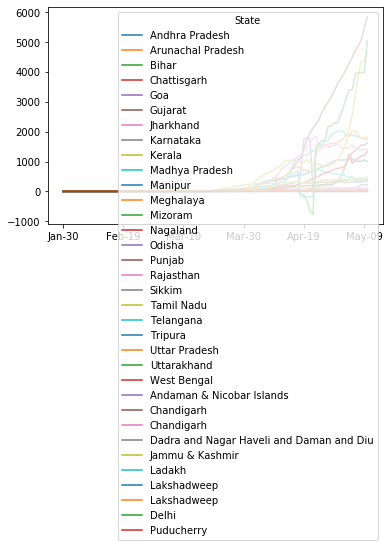

In [73]:
cvd.plot()

#### Note:
Since I was not interested in the data of all states, in the steps below, I will isolate the data from six states covered in the survey. 

In [74]:
cvd_mini_active = cvd[['Andhra Pradesh', 'Rajasthan', 'Bihar', 'Uttar Pradesh', 'Jharkhand', 'Madhya Pradesh']]
cvd_mini_active

State,Andhra Pradesh,Rajasthan,Bihar,Uttar Pradesh,Jharkhand,Madhya Pradesh
Jan-30,0,0,0,0,0,0
Jan-31,0,0,0,0,0,0
Feb-01,0,0,0,0,0,0
Feb-02,0,0,0,0,0,0
Feb-03,0,0,0,0,0,0
...,...,...,...,...,...,...
May-06,1012,1455,374,2028,85,1854
May-07,1015,1397,305,1881,88,1828
May-08,1004,1397,305,1761,77,1792
May-09,1047,1397,370,1761,77,1792


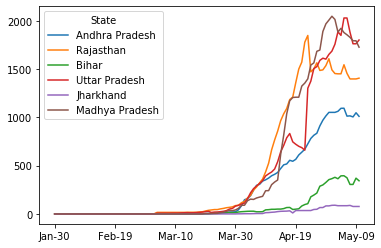

In [75]:
cvd_mini_active.plot()

#### Note:
Since the data above is the total number of active cases in each state, a direct comparision between them would not be fair or accurate. Therefore, I decided to divide each value by the population of each state. The projected population of each state was taken from [Census India's website](https://censusindia.gov.in/Census_Data_2001/Projected_Population/Projected_Population.pdf). However, since the last census survey was conducted in 2011, when Andhra Pradesh was undivided, its projections were for AP and Telangana together. Therefore, the projected population of this state was taken from the [state government's website.](http://www.populationu.com/in/andhra-pradesh-population)

In [76]:
pop_dict = {'Andhra Pradesh': 53903393,
           'Madhya Pradesh': 82134000,
           'Rajasthan': 76759000,
           'Uttar Pradesh': 231425000,
           'Bihar': 108372000,
           'Jharkhand':108372000 }
pop_dict

{'Andhra Pradesh': 53903393,
 'Madhya Pradesh': 82134000,
 'Rajasthan': 76759000,
 'Uttar Pradesh': 231425000,
 'Bihar': 108372000,
 'Jharkhand': 108372000}

In [77]:
#Creating a new dataframe to store proportional values of active cases in each state:
cvd_mini_active_prop = pd.DataFrame() 
for i in pop_dict:
    var = i+'_prop'
    cvd_mini_active_prop[var] = (cvd_mini_active[i]/pop_dict[i])*100000

#### Note: 
In the lines above, I have calculated the number of active cases per 1,00,000 (1 lakh) people as it is a convenient unit of population that people can relate to. 

In [78]:
cvd_mini_active_prop

,Andhra Pradesh_prop,Madhya Pradesh_prop,Rajasthan_prop,Uttar Pradesh_prop,Bihar_prop,Jharkhand_prop
Jan-30,0,0,0,0,0,0
Jan-31,0,0,0,0,0,0
Feb-01,0,0,0,0,0,0
Feb-02,0,0,0,0,0,0
Feb-03,0,0,0,0,0,0
...,...,...,...,...,...,...
May-06,1.87743,2.25729,1.89554,0.87631,0.345108,0.0784335
May-07,1.883,2.22563,1.81998,0.81279,0.281438,0.0812018
May-08,1.86259,2.1818,1.81998,0.760938,0.281438,0.0710516
May-09,1.94236,2.1818,1.81998,0.760938,0.341417,0.0710516


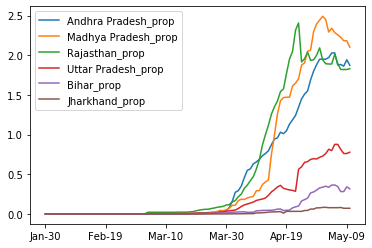

In [79]:
cvd_mini_active_prop.plot()

#### Final note:
Looking at this chart provides no pattern that collates with what we know about rise in expenses based on the survey above. While Andhra Pradesh and Rajasthan are both states which a relatively higher rise in expenses, the presence of Madhya Pradesh indicates that though the number of cases may have been high, it did not necessarily relate or translate to a rise in household expenses. Thus, a decision was made to skip this part in the article (along with the reasons outlined in the start of this section).